In [1]:
import matplotlib.pyplot as plt
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
from pathlib import Path

In [2]:
df = pd.read_csv("\yourdata.csv")
df.head()

,Date,Price
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


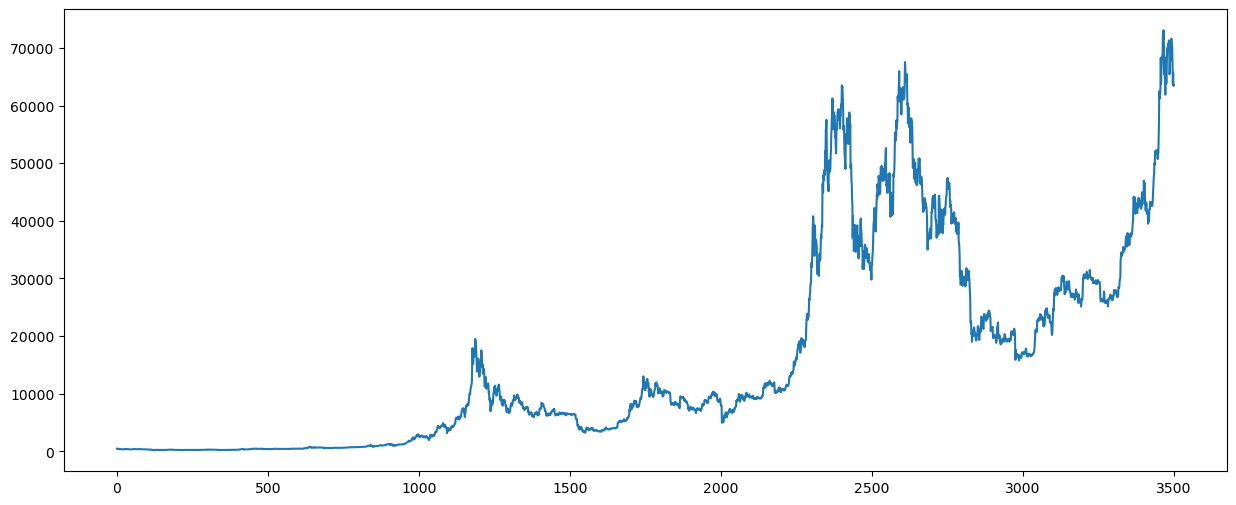

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(df['Price'].values)

In [4]:
df.isnull().count()

Date     3500
Price    3500
dtype: int64

In [5]:
df['Price'] = df['Price'].dropna()

In [6]:
df.isnull().count()

Date     3500
Price    3500
dtype: int64

C:\Users\Tedi\anaconda3\Lib\site-packages\lppls\lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
C:\Users\Tedi\anaconda3\Lib\site-packages\lppls\lppls.py:213: RuntimeWarning: invalid value encountered in log
  O = (w / (2.0 * np.pi)) * np.log((tc - first) / (tc - last))


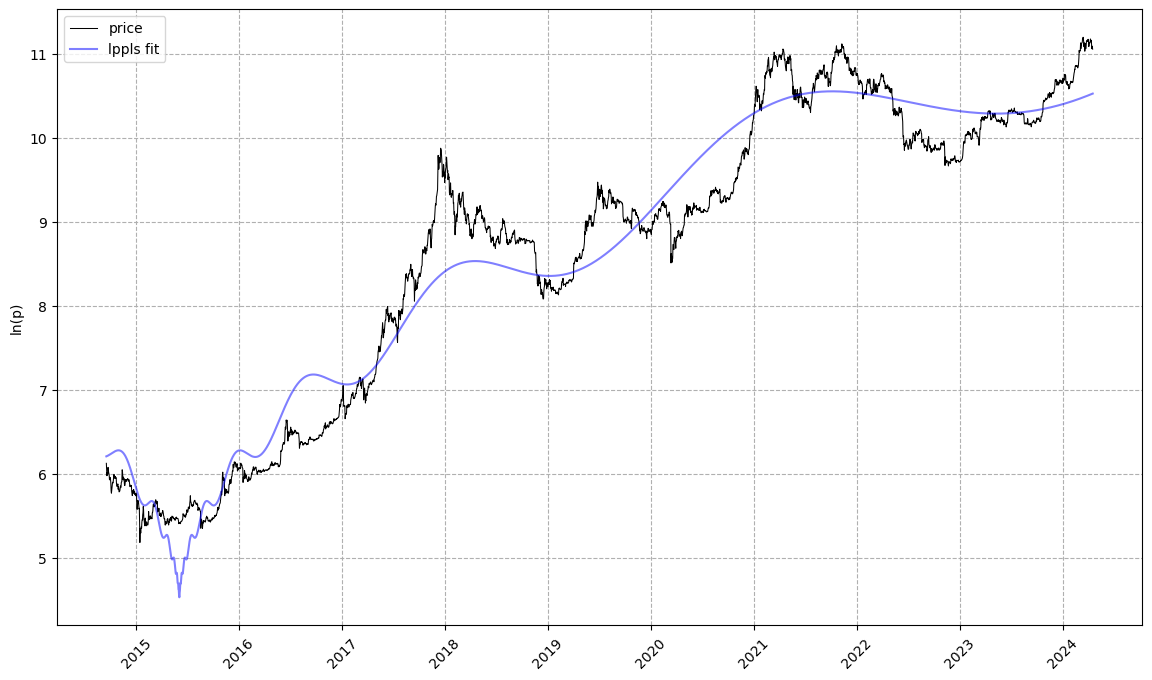

In [7]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in df['Date']]

price = np.log((df['Price']).values)

observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

lppls_model = lppls.LPPLS(observations=observations)

tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

lppls_model.plot_fit()

100%|██████████████████████████████████████████████████████████████████████████████| 3381/3381 [33:52<00:00,  1.66it/s]


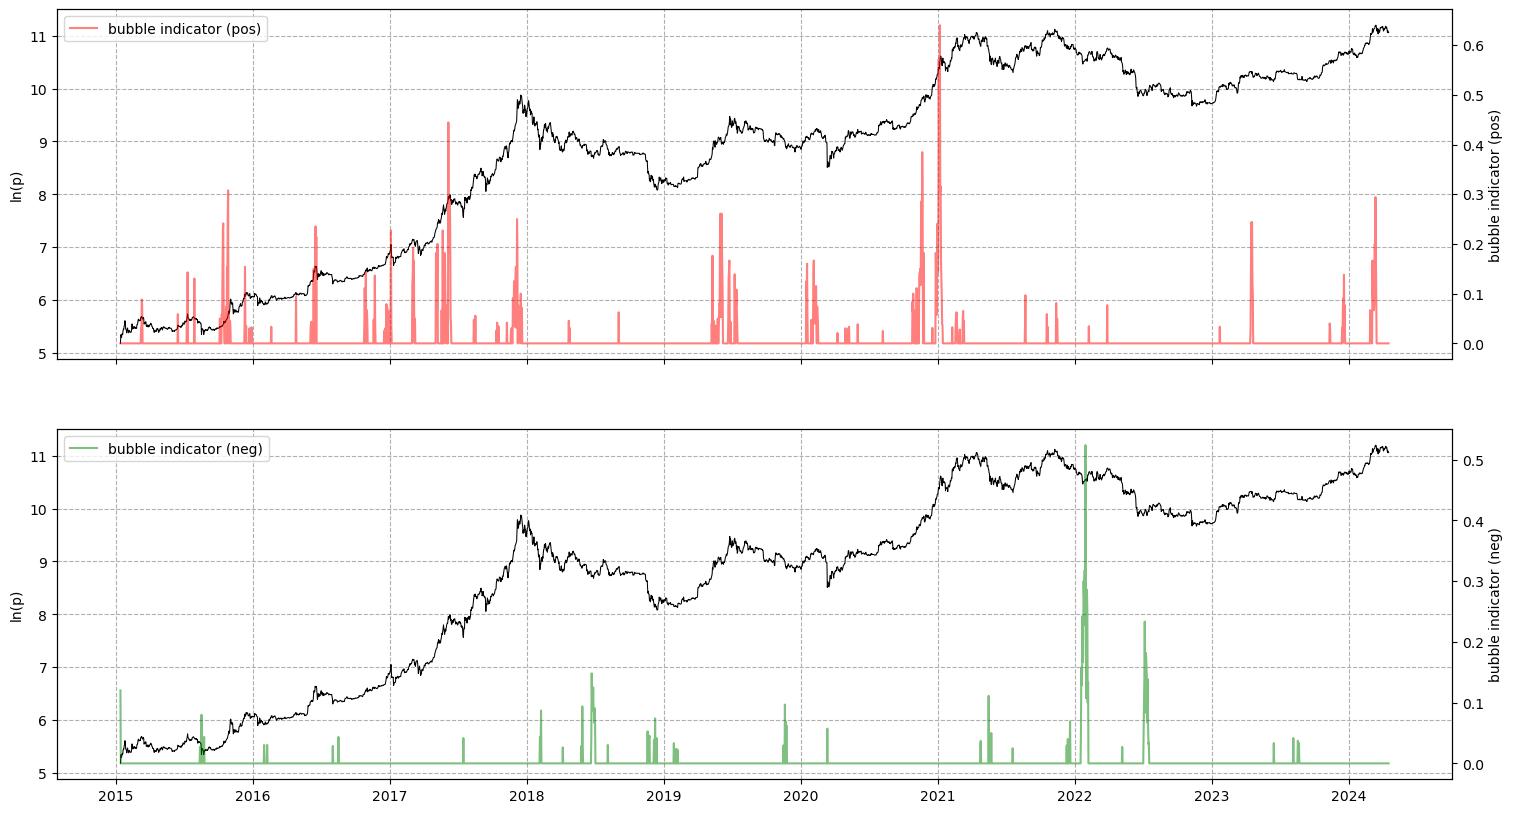

In [8]:
res = lppls_model.mp_compute_nested_fits(
    workers=10,
    window_size=120, 
    smallest_window_size=10, 
    outer_increment=1, 
    inner_increment=2, 
     max_searches=25)

lppls_model.plot_confidence_indicators(res)

In [9]:
res_df = lppls_model.compute_indicators(res)
res_df

,time,price,pos_conf,neg_conf,_fits
0,735612.0,5.182362,0.0,0.12,"[{'tc': 734941.5268693776, 'm': 2.060879827148..."
1,735613.0,5.346364,0.0,0.00,"[{'tc': 735618.3552836168, 'm': 1.495877679890..."
2,735614.0,5.338004,0.0,0.00,"[{'tc': 735882.1940367434, 'm': -0.16099806008..."
3,735615.0,5.294610,0.0,0.00,"[{'tc': 735615.0008531306, 'm': 1.439015522813..."
4,735616.0,5.348721,0.0,0.00,"[{'tc': 735848.0353221002, 'm': 0.388590950073..."
...,...,...,...,...,...
3376,738988.0,11.115367,0.0,0.00,"[{'tc': 739054.8854611062, 'm': 1.818368570068..."
3377,738989.0,11.063845,0.0,0.00,"[{'tc': 738978.5667353515, 'm': 1.845976140115..."
3378,738990.0,11.093443,0.0,0.00,"[{'tc': 993183.3146850462, 'm': 0.580924958364..."
3379,738991.0,11.057632,0.0,0.00,"[{'tc': 4710147.3822270185, 'm': 5.04051985491..."


In [10]:
filepath = Path('\.\Data.csv') 

res_df.to_csv(filepath)